# Resonant pendel

Vi modellerer en pendel som kan resonnere. En pendel er festet i et oppheng $P$ som flytter seg med tiden:
$$ x_P(t) = A \cos \omega_d t .$$
Pendelen er en matematisk pendel med lengde $\ell$ og punktmasse $m$. 
Posisjonen til massen er gitt ved
$$ x = x_P + \ell \sin \theta, \quad 
y = -\ell \cos \theta. $$

Vi betrakter pendelen i det akselererte referansesystemet $S'$ som beveger seg med $x_P$.
(Se eget notat om dette.)
I dette systemet er pendelen hengslet i origo $O'$.
Kreftene som virker på massen er gitt ved
$$ 
\begin{align*}
\mathbf{F}_f &= - b \mathbf{v} = - b \dot{\mathbf{r}} = - b [ ( \dot x_P + \ell \cos \theta \dot \theta) \hat{\bf x} + \ell \sin \theta \dot\theta \hat{\bf y}] \quad & \text{(luftmotstand)} \\
\mathbf{F}_g &= - m g \hat{\mathbf y} \quad & \text{(gravitasjon)} \\
\mathbf{F}_{\rm im} &= - m \ddot{x}_b \hat{\bf x} & \text{(imaginær kraft fordi $S'$ er aksellerert)}
\end{align*}
$$
slik at dreiemomentet om $O'$ er gitt ved $\tau_{O'} = \tau_f + \tau_g + \tau_{\rm im}$ der
$$ 
\begin{align*}
\tau_f &=& \ell [ \sin \theta \hat{\bf x} - \cos \theta \hat{\bf y} ] \times {\bf F}_f 
&= - b [ \ell^2 \dot \theta + \ell \dot x_P \cos \theta ] \hat{\bf z}, \\
\tau_g &=& \ell [ \sin \theta \hat{\bf x} - \cos \theta \hat{\bf y} ] \times {\bf F}_g &= - m g \ell \sin \theta \hat{\bf z}, \\
\tau_{\rm im} &=& \ell [ \sin \theta \hat{\bf x} - \cos \theta \hat{\bf y} ] \times {\bf F}_{\rm im} &= -m \ell \ddot{ x}_b \cos \theta \hat{\bf z},
\end{align*}
$$

Dreiemomentbalansen i $S'$ om $O'$ er gitt ved
$$ 
\begin{align*}
\frac{d L_{O'}}{dt} &= I \ddot\theta = \tau_{O'} \\
&= - m g \ell \sin \theta - b [ \ell^2 \dot \theta + \ell \dot x_P \cos \theta ] - m \ell \cos \theta \ddot x_P \\
&= - m g \ell \sin \theta - b [ \ell^2 \dot \theta - \ell A \omega_d \sin \omega_d t \cos \theta ] + m \ell A \omega_d^2 \cos \theta \cos \omega_d t .
\end{align*}
$$
Dermed finner vi for vinkelakselerasjonen:
$$ 
\begin{align*}
\ddot \theta &= - \frac{g}{\ell} \sin \theta - \frac{b}{m} [ \dot \theta - \frac{A}{\ell} \omega_d \sin \omega_d t \cos \theta ] + \frac{A}{\ell} \omega_d^2 \cos \theta \cos \omega_d t \\
&= - \omega^2 \sin \theta - 2 \gamma \dot \theta + a \omega_d \left[ 2 \gamma  \sin \omega_d t + \omega_d \cos \omega_d t \right] \cos \theta
\end{align*}
$$
hvor vi har definert de tre parametrene
$$
\omega = \sqrt{\frac g \ell}, \quad \gamma = \frac{b}{2 m}, \quad a = \frac{A}{\ell}.
$$
Vi definerer parametre og implementerer høyresiden (RHS) i ODE-systemet vi skal løse og tester responsen for en gitt svingefrekvens $\omega_d$:

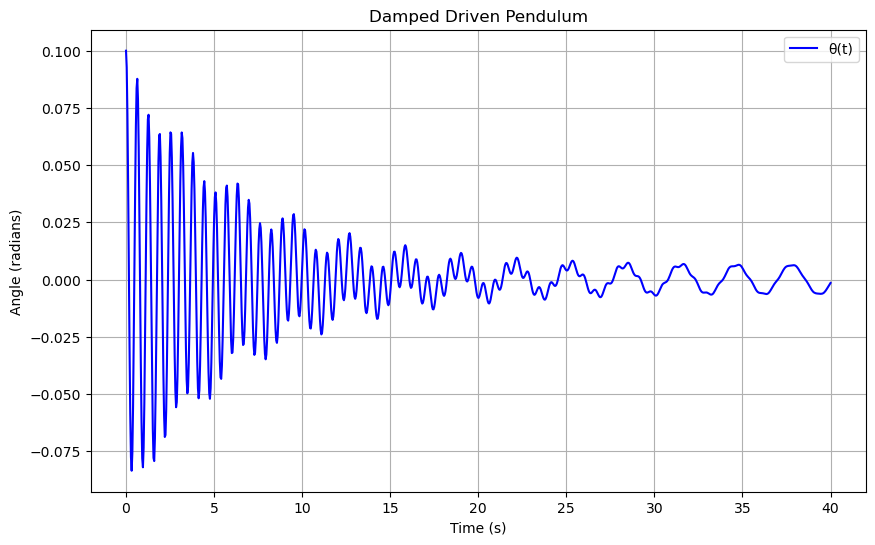

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g = 9.81  # Acceleration due to gravity (m/s^2)
l = 0.1  # Length of the pendulum (m)
b = 0.03  # Damping coefficient (kg/s)
m = 0.1  # Mass of the pendulum bob (kg)
A = 0.015 # Amplitude of the driving motion (m)

omega = np.sqrt(g / l)  # Natural frequency of the pendulum (rad/s)
gamma = b / (2 * m)  # Damping ratio (1/s)
a = A / l  # Relative amplitude of the driving motion

omega_d = 2.0 # Driving frequency (rad/s)

T = 40.0  # Total time for simulation (s)

def rhs(t, y, omega, gamma, a, omega_d):
    theta, dtheta = y
    d2theta = (- omega**2 * np.sin(theta) - 2 * gamma * dtheta 
        + a * omega_d * ( 2 * gamma * np.sin(omega_d * t) + omega_d * np.cos(omega_d * t) ) * np.cos(theta))
    return [dtheta, d2theta]

# Time span for the simulation
t_span = (0, T)  # Simulate for 20 seconds
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Initial conditions: [theta(0), dtheta(0)]
initial_conditions = [0.1, 0.0]  # Initial angle (radians) and initial angular velocity (rad/s)
# Solve the ODE
sol = solve_ivp(rhs, t_span, initial_conditions, args=(omega, gamma, a, omega_d), t_eval=t_eval)
# Extract the results
theta = sol.y[0]  # Angle as a function of time

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sol.t, theta, label='θ(t)', color='blue')
ax.set_title('Damped Driven Pendulum')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle (radians)')
ax.grid()
ax.legend()
plt.show()


Så gjør vi et skann over en rekke $\omega_d$ for å sjekke responsen, og finne resonans:

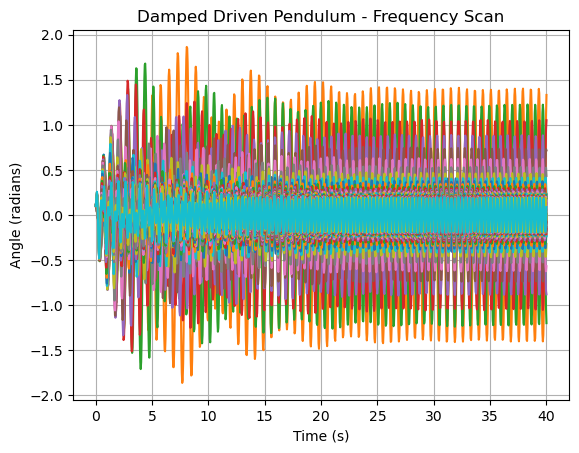

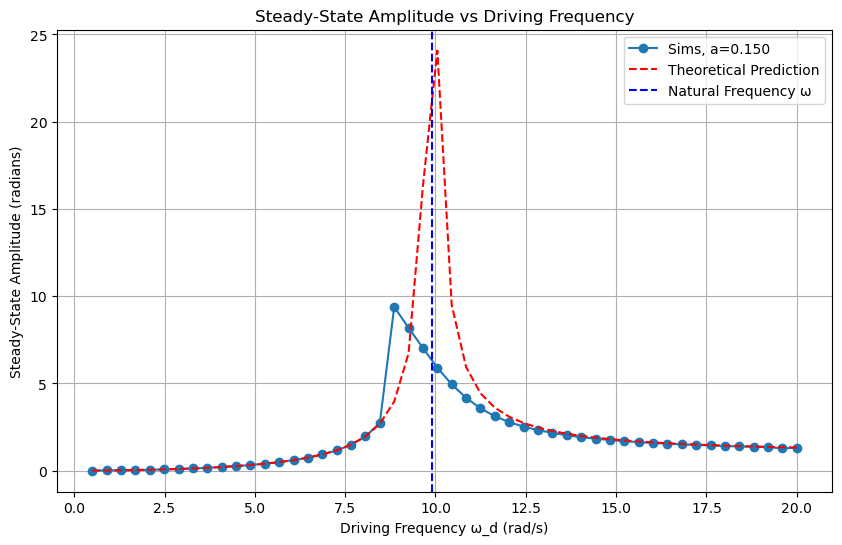

In [2]:
# make a scan over omega_d
omega_d_ = np.linspace(0.5, 20.0, 50)

def find_amplitude(t, theta):
    # Find the amplitude of oscillation after transient effects
    steady_state_start = int(0.8 * len(t))  # Consider last 20% of the time series
    return (np.max(theta[steady_state_start:]) - np.min(theta[steady_state_start:])) / 2

amplitude_ = np.zeros_like(omega_d_)

for i, omega_d in enumerate(omega_d_):
    sol = solve_ivp(rhs, t_span, initial_conditions, args=(omega, gamma, a, omega_d), t_eval=t_eval)
    theta = sol.y[0]
    amplitude_[i] = find_amplitude(sol.t, theta)
    plt.plot(sol.t, theta, label=f'ω_d={omega_d:.2f} rad/s')
plt.title('Damped Driven Pendulum - Frequency Scan')
plt.xlabel('Time (s)')
plt.ylabel('Angle (radians)')
plt.grid()
#plt.legend()
plt.show()

red_amplitude_th_ = omega_d_ * np.sqrt((omega_d_**2 + 4*gamma**2)/((omega**2 - omega_d_**2)**2 + (2 * gamma * omega_d_)**2))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(omega_d_, amplitude_/a, marker='o', label=f"Sims, a={a:.3f}")
ax.plot(omega_d_, red_amplitude_th_, '--', label='Theoretical Prediction', color='red')
ax.set_title('Steady-State Amplitude vs Driving Frequency')
ax.set_xlabel('Driving Frequency ω_d (rad/s)')
ax.set_ylabel('Steady-State Amplitude (radians)')

# vline with natural frequency
ax.axvline(omega, color='blue', linestyle='dashed', label='Natural Frequency ω')
ax.legend()

ax.grid()
plt.show()

Til slutt lager vi en kul video. Prøv selv i praksis?

In [ ]:
# Make animation of the pendulum motion and save as mp4 file
from matplotlib.animation import FuncAnimation

# Solve the ODE
sol = solve_ivp(rhs, t_span, initial_conditions, args=(omega, gamma, a, omega_d_[np.argmax(amplitude_)]), t_eval=t_eval)
# Extract the results
theta = sol.y[0]  # Angle as a function of time

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-l - A - 0.1, l + A + 0.1)
ax.set_ylim(-l - A - 0.1, l + A + 0.1)
line, = ax.plot([], [], 'o-', lw=2) # Pendulum line 
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text
def update(frame):
    t = sol.t[frame]
    theta_t = theta[frame]
    x_pivot = A * np.sin(omega_d * t)
    y_pivot = 0
    x_bob = x_pivot + l * np.sin(theta_t)
    y_bob = y_pivot - l * np.cos(theta_t)
    line.set_data([x_pivot, x_bob], [y_pivot, y_bob])
    time_text.set_text(f'Time = {t:.2f} s')
    return line, time_text

ani = FuncAnimation(fig, update, frames=len(sol.t), init_func=init, blit=True, interval=20)
ani.save('damped_driven_pendulum.mp4', writer='ffmpeg', fps=30)
plt.close()

Vi gjør også et skann over $(a, \omega_d)$ for å finne ut hvor bra det teoretiske uttrykket passer.

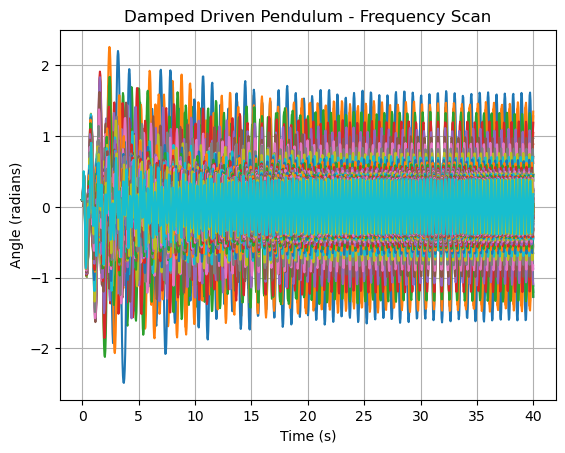

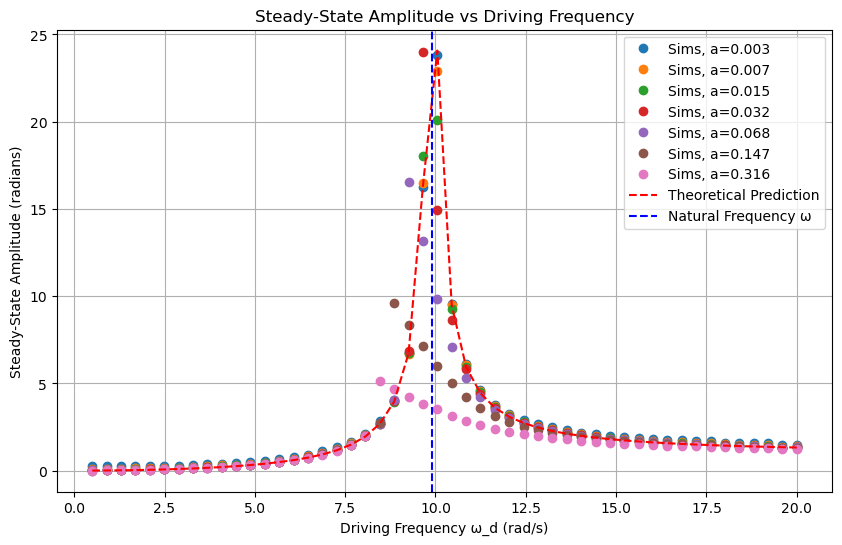

In [ ]:
# make a scan over a and omega_d
omega_d_ = np.linspace(0.5, 20.0, 50)
a_ = np.logspace(-2.5, -0.5, 7)

amplitude_ = np.zeros((len(a_), len(omega_d_)))

for j, a in enumerate(a_):
    for i, omega_d in enumerate(omega_d_):
        sol = solve_ivp(rhs, t_span, initial_conditions, args=(omega, gamma, a, omega_d), t_eval=t_eval)
        theta = sol.y[0]
        amplitude_[j, i] = find_amplitude(sol.t, theta)
        plt.plot(sol.t, theta, label=f'ω_d={omega_d:.2f} rad/s')
plt.title('Damped Driven Pendulum - Frequency Scan')
plt.xlabel('Time (s)')
plt.ylabel('Angle (radians)')
plt.grid()
#plt.legend()
plt.show()

B_ = omega_d_**2 + 4*gamma**2
Delta_ = omega**2 - omega_d_**2
D_ = Delta_**2 + (2 * gamma * omega_d_)**2
red_amplitude_th_ = omega_d_ * np.sqrt(B_/D_)
#red_amplitude_th_corr_ = omega_d_**2 * B_ * (omega**2 - 3*Delta_**2 - (2*gamma*omega_d_)**2)/(16*D_**2)

red_amplitude_simp_ = omega_d_ * np.sqrt(omega_d_**2 / (omega**2 - omega_d_**2))

fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(a_)):
    ax.plot(omega_d_, amplitude_[i, :]/a_[i], marker='o', linestyle='none', label=f"Sims, a={a_[i]:.3f}")
ax.plot(omega_d_, red_amplitude_th_, '--', label='Theoretical Prediction', color='red')
ax.plot(omega_d_, red_amplitude_simp_, '--', label='Simplified Theoretical Prediction', color='green')
ax.set_title('Steady-State Amplitude vs Driving Frequency')
ax.set_xlabel('Driving Frequency ω_d (rad/s)')
ax.set_ylabel('Steady-State Amplitude (radians)')

# vline with natural frequency
ax.axvline(omega, color='blue', linestyle='dashed', label='Natural Frequency ω')
ax.legend()

ax.grid()
plt.show()


Alternativt kan vi se på en luftmotstand som er kvadratisk i hastigheten (dette vil neppe være mer realistisk ved små svingehastigheter, men vi prøver likevel):
\begin{align*}
\mathbf{F}_f &= - c v \mathbf{v} = - c |\dot{\mathbf{r}}| \dot{\mathbf{r}} \\
&= - c \sqrt{ \dot x_P^2 + 2 \dot x_P \ell \cos \theta \dot \theta + \ell^2 \dot \theta^2  } [ ( \dot x_P + \ell \cos \theta \dot \theta) \hat{\bf x} + \ell \sin \theta \dot\theta \hat{\bf y}] \quad & \text{(luftmotstand)} 
\end{align*}
Vi ser at vi bare trenger å endre $b \to c \sqrt{ \dot x_P^2 + 2 \dot x_P \ell \cos \theta \dot \theta + \ell^2 \dot \theta^2  } = c \sqrt{ (A \omega_d)^2 \sin^2 \omega_d t - 2 A \omega_d \sin \omega_d \ell \cos \theta \dot \theta + \ell^2 \dot \theta^2  }$ i uttrykket over for i innpasse denne kraften.
Dette gir vinkelakselerasjonen:
$$ 
\begin{align*}
\ddot \theta &= - \frac{g}{\ell} \sin \theta - \frac{c \ell}{m} \sqrt{ \left(\frac{A \omega_d}{\ell} \right)^2 \sin^2 \omega_d t - 2 \frac{A \omega_d}{\ell} \sin \omega_d t \cos \theta \dot \theta + \dot \theta^2 } [ \dot \theta - \frac{A}{\ell} \omega_d \sin \omega_d t \cos \theta ] + \frac{A}{\ell} \omega_d^2 \cos \theta \cos \omega_d t \\
&= - \omega^2 \sin \theta - 2 \Gamma \sqrt{ a^2 \omega_d^2 \sin^2 \omega_d t - 2 a \omega_d \sin \omega_d t \cos \theta \dot \theta + \dot \theta^2 } \left[ \dot \theta - a \omega_d \sin \omega_d t \cos \theta \right] + a \omega_d^2 \cos \theta \cos \omega_d t
\end{align*}

In [5]:
def rhs2(t, y, omega, Gamma, a, omega_d):
    theta, dtheta = y
    gamma = Gamma * np.sqrt(
        a**2 * omega_d**2 * np.sin(omega_d * t)**2 
        - 2 * a * omega_d * np.sin(omega_d * t) * np.cos(theta) * dtheta
        + dtheta**2
        )
    d2theta = (- omega**2 * np.sin(theta) - 2 * gamma * dtheta 
        + a * omega_d * ( 2 * gamma * np.sin(omega_d * t) + omega_d * np.cos(omega_d * t) ) * np.cos(theta))
    return [dtheta, d2theta]

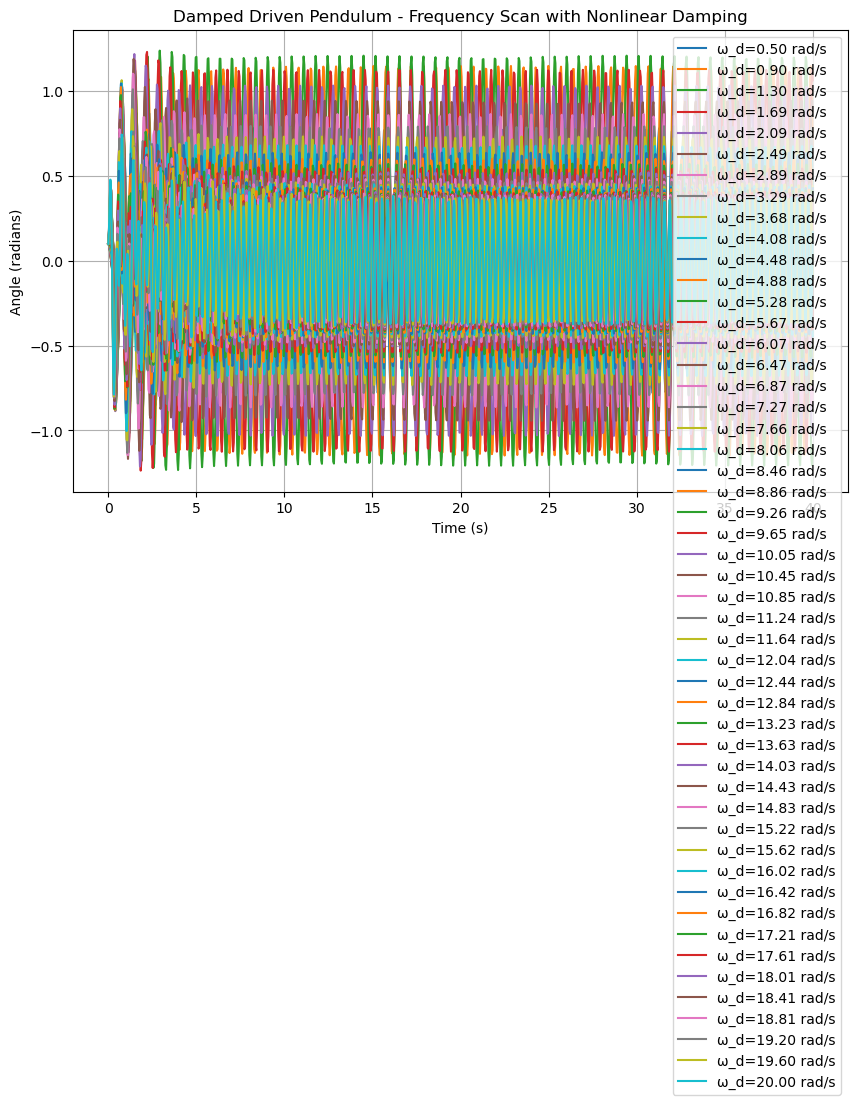

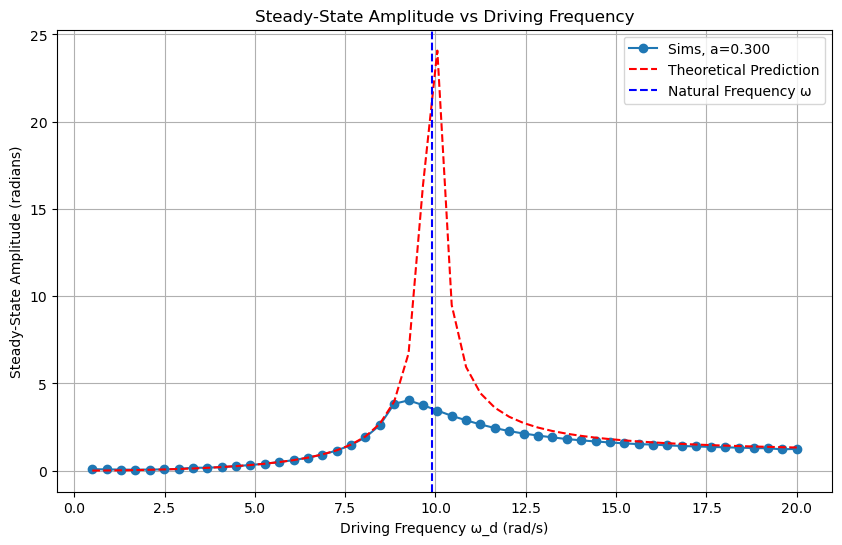

In [6]:
# make a scan over omega_d
omega_d_ = np.linspace(0.5, 20.0, 50)
amplitude_ = np.zeros_like(omega_d_)

a = 0.3
Gamma = 0.1

fig, ax = plt.subplots(figsize=(10, 6))
for i, omega_d in enumerate(omega_d_):
    sol = solve_ivp(rhs2, t_span, initial_conditions, args=(omega, Gamma, a, omega_d), t_eval=t_eval)
    theta = sol.y[0]
    amplitude_[i] = find_amplitude(sol.t, theta)
    ax.plot(sol.t, theta, label=f'ω_d={omega_d:.2f} rad/s')

ax.set_title('Damped Driven Pendulum - Frequency Scan with Nonlinear Damping')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle (radians)')
ax.grid()
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(omega_d_, amplitude_/a, marker='o', label=f"Sims, a={a:.3f}")
ax.plot(omega_d_, red_amplitude_th_, '--', label='Theoretical Prediction', color='red')
ax.set_title('Steady-State Amplitude vs Driving Frequency')
ax.set_xlabel('Driving Frequency ω_d (rad/s)')
ax.set_ylabel('Steady-State Amplitude (radians)')

# vline with natural frequency
ax.axvline(omega, color='blue', linestyle='dashed', label='Natural Frequency ω')
ax.legend()

ax.grid()
plt.show()